# Gordon Ramsey Masterclass Web Tracking Analysis

The data sets contain data about users visiting the Gordon Ramsay MasterClass course marketing page for a certain period of time. This data is captured by Segment’s analytics.js library and passed to Redshift, Amplitude, and other platforms.

In this notebook, we are going analyze web tracking data of the Gordon Ramsay MasterClass course webpage on the Masterclass web plateform. 
We will first explore the 5 differents datasets in order to get a sens of which information could be extracted from them. 

We will investigate:
- Web traffic: The number of people visiting the page on the given time periode
        - From the homepage, on which course to visitors click the most
        - Time influence on the web visits 
- Masterclass related caracteristics: The most popular ones, the more profitable ones.
- Analysis of the traffic sources
- Analysis of the advertisement types
- Analysis of the acquisistion type
  

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load Data
cours_marketing_click = pd.read_csv('/Users/anavekua/Documents/Data/Data_projects/InterviewQuery-Gordon Ramsay Masterclass EDAt-takehome/data/course_marketing_click.csv')
homepage_click = pd.read_csv('/Users/anavekua/Documents/Data/Data_projects/InterviewQuery-Gordon Ramsay Masterclass EDAt-takehome/data/homepage_click.csv')
pages = pd.read_csv('/Users/anavekua/Documents/Data/Data_projects/InterviewQuery-Gordon Ramsay Masterclass EDAt-takehome/data/pages.csv')
purchased_class = pd.read_csv('/Users/anavekua/Documents/Data/Data_projects/InterviewQuery-Gordon Ramsay Masterclass EDAt-takehome/data/purchased_class.csv')
purchased_click = pd.read_csv('/Users/anavekua/Documents/Data/Data_projects/InterviewQuery-Gordon Ramsay Masterclass EDAt-takehome/data/purchase_click.csv')


### Exploration of the different datasets

#### 1. cours_marketing_click dataset

This dataset contains information about any click on the different course pages (except purchase click) <br>
**anonymous_id** : an identifier given to unique device session  <br>
**received_at**: when the event or page view occurred <br>
**location**: place on the page where the event occurred <br>
**action**: descriptor given to event <br>

In [214]:
cours_marketing_click.head()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,anonymous_id,received_at,class,location,action,video,video_carousel_number
0,b8d1d717-f4b1-4d39-9383-f63b32b74fce,11/1/2017 0:04:32,gordon-ramsay-teaches-cooking,hero,play-trailer,trailer,NaN
1,074b9167-b7f3-4f0d-8e13-c93dc9d2ba6a,11/1/2017 0:05:19,aaron-sorkin-teaches-screenwriting,hero,play-trailer,trailer,NaN
2,074b9167-b7f3-4f0d-8e13-c93dc9d2ba6a,11/1/2017 0:09:35,gordon-ramsay-teaches-cooking,hero,play-trailer,trailer,NaN
3,45d158e5-2ff7-4aab-b6ad-70dcc27ebaa9,11/1/2017 0:10:04,gordon-ramsay-teaches-cooking,hero,play-trailer,trailer,NaN
4,074b9167-b7f3-4f0d-8e13-c93dc9d2ba6a,11/1/2017 0:11:56,frank-gehry-teaches-design-and-architecture,hero,play-trailer,trailer,NaN


**What can we extract?**
    <ul> 
    <li>number of people reaching the GR page per day </li>
    <li>When people visit GR page, where do they click the most? </li>
    <li> What action is mostly taken on GR page? </li>
    </ul>

In [215]:
#We filter data about Gordon Ramsey Course
GR_cours_marketing = cours_marketing_click[cours_marketing_click["class"] == "gordon-ramsay-teaches-cooking"]

In [ ]:
#What can we extract? 
    #number of people reaching the GR page per day
    #When people visit GR page, where do they click the most? 
    #What action is mostly taken on GR page? 

In [12]:
cours_marketing_click["location"].unique()

array(['hero', 'autoplay', 'video-carousel', 'recommended-section',
       'body', 'sticky', 'learn-more'], dtype=object)

In [58]:
cours_marketing_click["action"].unique()

array(['play-trailer', 'play-gem', 'steve-martin-teaches-comedy',
       'shonda-rhimes-teaches-writing-for-television',
       'reba-mcentire-teaches-country-music',
       'serena-williams-teaches-tennis', 'lesson-plan',
       'garry-kasparov-teaches-chess', 'gordon-ramsay-teaches-cooking',
       'faq', 'play-select', 'hans-zimmer-teaches-film-scoring',
       'dustin-hoffman-teaches-acting', 'samuel-l-jackson-teaches-acting',
       'usher-teaches-the-art-of-performance',
       'frank-gehry-teaches-design-and-architecture', 'workbook',
       'christina-aguilera-teaches-singing',
       'james-patterson-teaches-writing',
       'diane-von-furstenberg-teaches-building-a-fashion-brand',
       'judy-blume-teaches-writing',
       'david-mamet-teaches-dramatic-writing',
       'martin-scorsese-teaches-filmmaking',
       'herbie-hancock-teaches-jazz',
       'aaron-sorkin-teaches-screenwriting', 'office-hours',
       'werner-herzog-teaches-filmmaking',
       'jane-goodall-teaches-

#### 2: Homepage_click dataset

This dataset contains information about any click on the homepage. <br>
**anonymous_id**: an identifier given to unique device session <br>
**received_at**: when the event or page view occurred <br>
**location**: place on the page where the event occurred <br>
**action**: descriptor given to event <br>


In [4]:
homepage_click.head()

,anonymous_id,received_at,action,class,location
0,e921f531-128f-4e71-922d-28f71d65dc93,11/1/2017 0:15:58,gordon-ramsay-teaches-cooking,NaN,tile
1,e921f531-128f-4e71-922d-28f71d65dc93,11/1/2017 0:14:24,steve-martin-teaches-comedy,NaN,hero
2,e921f531-128f-4e71-922d-28f71d65dc93,11/1/2017 0:14:23,samuel-l-jackson-teaches-acting,NaN,hero
3,e921f531-128f-4e71-922d-28f71d65dc93,11/1/2017 0:14:21,martin-scorsese-teaches-filmmaking,NaN,hero
4,399c0019-7367-43c1-88e3-0d9a74885710,11/1/2017 0:27:39,gordon-ramsay-teaches-cooking,NaN,hero


**What can we extract?**
    <ul> 
    <li> Weekly time analysis: Number of distinct people reaching the homepage page per day over the time periode </li>
    <li> Hourly time analysis: Number of disctinct people reaching the homepage page at each hour </li>
    <li>The courses on which people clicked the most </li>
    </ul>


11/1/2017 0:02:04
11/7/2017 9:59:43


Text(0.5, 1.0, 'Count of distinct visitors by hour')

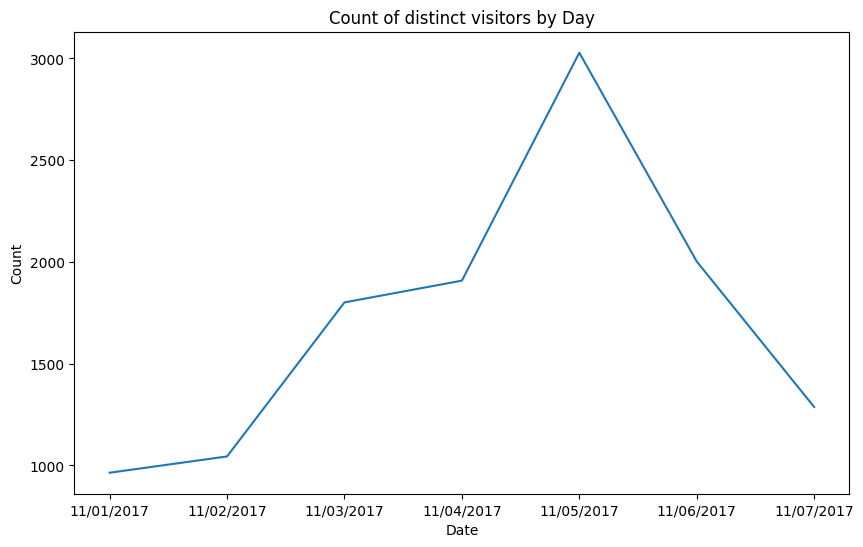

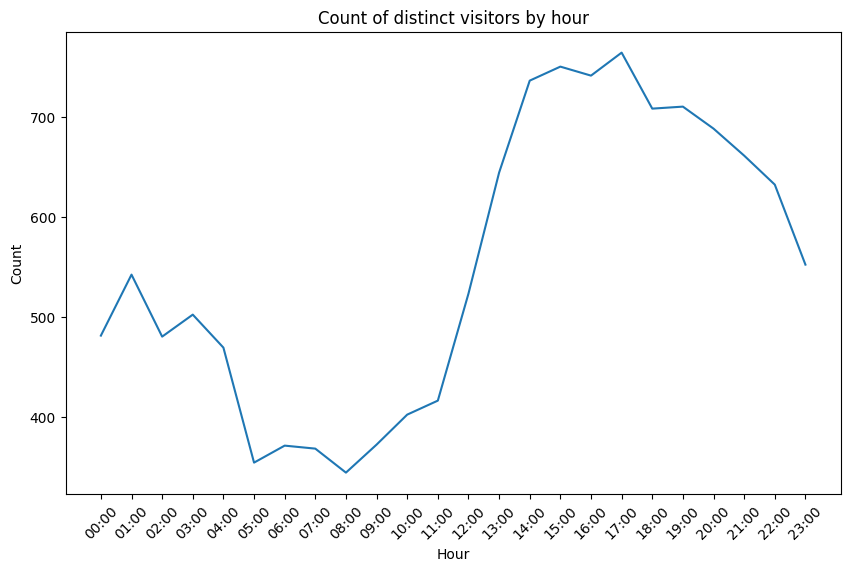

In [224]:
#Range of the time period
print(homepage_click['received_at'].min()) #11/1/2017 0:02:04
print(homepage_click['received_at'].max()) #11/7/2017 9:59:43

# Time analysis

## number of distinct visitors by days
homepage_click['Day'] = None
homepage_click['Day'] = pd.to_datetime(homepage_click['received_at']).dt.strftime('%m/%d/%Y')

homepage_groupby_day = homepage_click[['Day','anonymous_id']].groupby(by = 'Day').nunique()

# Plotting with Seaborn and matplotlib
homepage_groupby_day.reset_index(drop=False, inplace=True)
plt.figure(figsize=(10, 6))
sns.lineplot(data=homepage_groupby_day, x=homepage_groupby_day['Day'], y='anonymous_id')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of distinct visitors by Day')

## number of distinct visitors by hour
homepage_click['hour'] = None
homepage_click['hour'] = pd.to_datetime(homepage_click['received_at']).dt.strftime('%H:00')

homepage_groupby_hour = homepage_click[['hour','anonymous_id']].groupby(by = 'hour').nunique()

# Plotting with Seaborn and matplotlib
homepage_groupby_hour.reset_index(drop=False, inplace=True)
plt.figure(figsize=(10, 6))
sns.lineplot(data=homepage_groupby_hour, x=homepage_groupby_hour['hour'], y='anonymous_id')

plt.xlabel('Hour')
plt.ylabel('Count')
# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)
plt.title('Count of distinct visitors by hour')


#### 3. pages dataset

This dataset contains information about traffic sources, advertisment type, aquisition type of the home page and the Gordon Ramsey Masterclass page.

In [225]:
pages.head()

,anonymous_id,received_at,name,class,channel_grouping,traffic_source,ad_type,acquisition_type,user_agent
0,faff1903-357c-44e8-b98e-2d36d8be5832,11/01/2017 00:01:13,Course Marketing,gordon-ramsay-teaches-cooking,organic-social-pr,website,gr_mainpage,prospecting,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...
1,cb41781f-feb6-47ed-abe1-867716a0bc34,11/01/2017 00:01:39,Course Marketing,gordon-ramsay-teaches-cooking,paid,facebook,video,remarketing,Mozilla/5.0 (iPhone; CPU iPhone OS 11_0_1 like...
2,f48cb91d-4e6c-42ad-b32b-6e532c1b49b0,11/01/2017 00:02:07,Course Marketing,gordon-ramsay-teaches-cooking,NaN,NaN,NaN,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6...
3,f48cb91d-4e6c-42ad-b32b-6e532c1b49b0,11/01/2017 00:01:37,Home,NaN,NaN,NaN,NaN,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6...
4,b8d1d717-f4b1-4d39-9383-f63b32b74fce,11/01/2017 00:04:27,Course Marketing,gordon-ramsay-teaches-cooking,paid,facebook,video,remarketing,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6...


## Traffic sources and advertisment type
**What can we extract?**
    <ul> 
    <li> What are the main traffic sources </li>
    <li> What are the main adverstisment types </li>
    <li> Which combination of advertisment and traffic source works the best to bring visitors </li>
    </ul>


In [234]:
#We create a table with the combination of traffic sources and ad types for the Home page and for the course marketing pages
grouped_name_traffic_source_ad_type = pages.groupby(['name', 'traffic_source','ad_type'])
count_name_traffic_source_ad_type = grouped_name_traffic_source_ad_type['anonymous_id'].count()
count_name_traffic_source_ad_type = count_name_traffic_source_ad_type.to_frame('anonymous_id')
count_name_traffic_source_ad_type

anonymous_id
name             traffic_source        ad_type                            
Course Marketing affiliate             1006113                           1
                                       1062381                           6
                                       1188178                           1
                                       1305684                          32
                                       1365998                           6
...                                                                    ...
Home             bing_ads              search                           22
                 email                 cart-abandon-1                    7
                                       waitlist_confirmation             5
                 facebook              collection                     2015
                 google_search_network search                         3364

[101 rows x 1 columns]

#### Marketing courses: traffic sources and ad types

##### Marketing traffic sources

In [235]:
count_name_traffic_source_ad_type.reset_index(inplace=True)

In [247]:
course = count_name_traffic_source_ad_type[count_name_traffic_source_ad_type['name'] == 'Course Marketing']
course = course.sort_values(by = 'anonymous_id', ascending = False)
course.head(20)

,name,traffic_source,ad_type,anonymous_id
68,Course Marketing,instagram,video,26094
53,Course Marketing,facebook,video,20157
92,Course Marketing,youtube_network,video,7631
45,Course Marketing,facebook,image_carousel,3281
59,Course Marketing,google_search_network,search,2857
67,Course Marketing,instagram,vanitylink,773
66,Course Marketing,instagram,link,675
52,Course Marketing,facebook,vanitylink,583
60,Course Marketing,google_search_network,sitelink,508
44,Course Marketing,facebook,image,505


In [257]:
course_traffic_source = course.groupby(by = ['name','traffic_source'])

In [258]:
course_traffic_source = course_traffic_source['anonymous_id'].sum().sort_values(ascending=False)
course_traffic_source = course_traffic_source.to_frame()
course_traffic_source.reset_index(inplace=True)
course_traffic_source

,name,traffic_source,anonymous_id
0,Course Marketing,instagram,27815
1,Course Marketing,facebook,25125
2,Course Marketing,youtube_network,7632
3,Course Marketing,google_search_network,3368
4,Course Marketing,youtube,651
5,Course Marketing,google_display_network,290
6,Course Marketing,website,271
7,Course Marketing,masterclass,194
8,Course Marketing,affiliate,128
9,Course Marketing,email,106


A lot of the traffic sources do not bring a lot of visitors. 

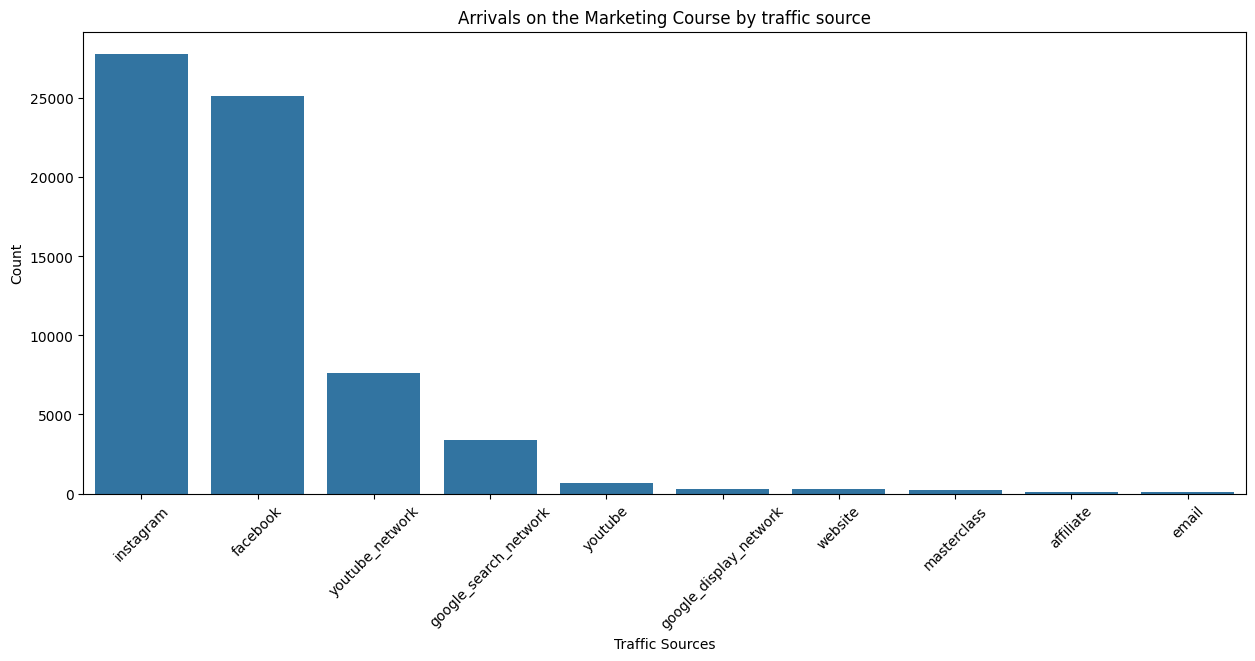

In [277]:
# Traffic sources to Marketing pages for sources that brings more than 100 visitors
course_traffic_source_over_100 = course_traffic_source[course_traffic_source['anonymous_id']> 100]

fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(x='traffic_source', y='anonymous_id', data=course_traffic_source_over_100)

# Show the plot
plt.xlabel('Traffic Sources')
plt.ylabel('Count')
plt.title('Arrivals on the Marketing Course by traffic source')


# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()

#### Marketing courses: source and ad type combination

In [291]:
course_traffic_source_ad_type = count_name_traffic_source_ad_type[count_name_traffic_source_ad_type['name'] == 'Course Marketing']
course_traffic_source_ad_type = course_traffic_source_ad_type.sort_values(by = ['traffic_source', 'anonymous_id'], ascending = [True, False])

traffic_source_over_100 = course_traffic_source_over_100['traffic_source'].unique()
print(traffic_source_over_100)
course_traffic_source_ad_type[course_traffic_source_ad_type['traffic_source'].isin(traffic_source_over_100)]

['instagram' 'facebook' 'youtube_network' 'google_search_network'
 'youtube' 'google_display_network' 'website' 'masterclass' 'affiliate'
 'email']


,name,traffic_source,ad_type,anonymous_id
6,Course Marketing,affiliate,1430173,62
3,Course Marketing,affiliate,1305684,32
12,Course Marketing,affiliate,288359,7
1,Course Marketing,affiliate,1062381,6
4,Course Marketing,affiliate,1365998,6
...,...,...,...,...
90,Course Marketing,youtube,vanitylink,430
88,Course Marketing,youtube,end_card,199
89,Course Marketing,youtube,link_card,22
92,Course Marketing,youtube_network,video,7631


/var/folders/5j/gmjn1fz50kscqtbqbsw5qdb80000gn/T/ipykernel_44448/1804437416.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45)


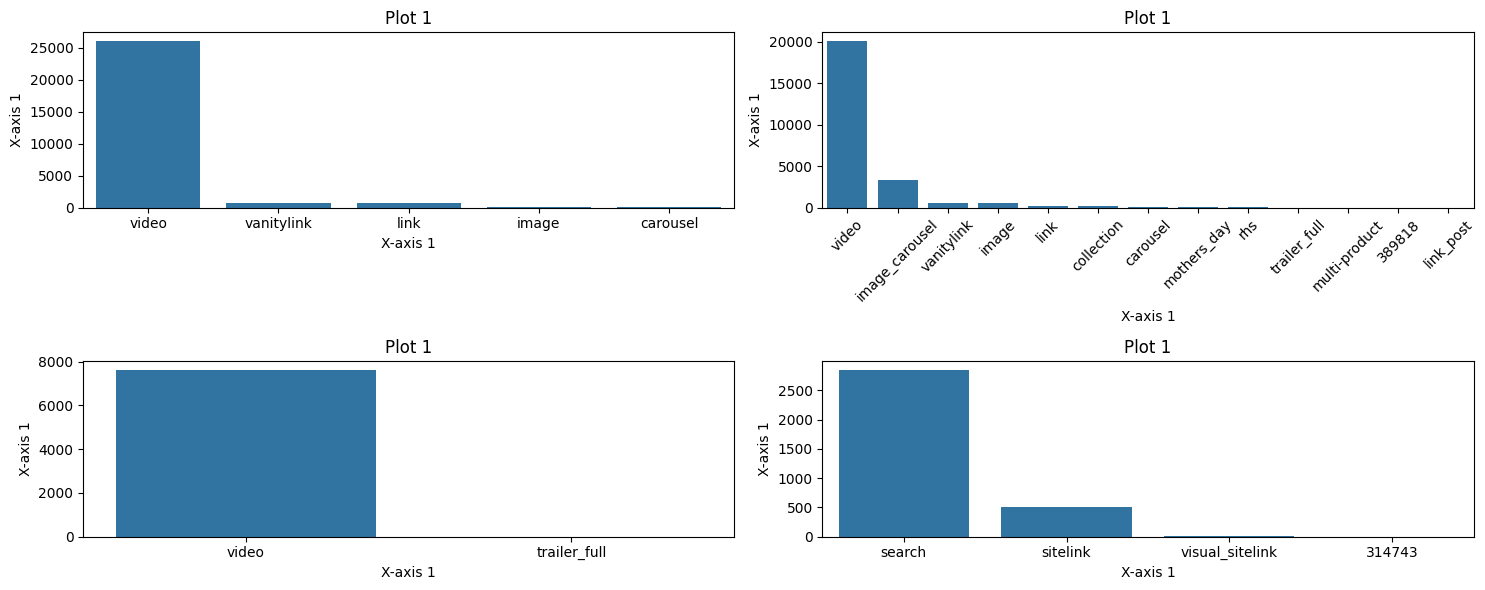

In [327]:
# Traffic sources to Marketing pages for sources that brings more than 100 visitors
course_traffic_source_over_100 = course_traffic_source[course_traffic_source['anonymous_id']> 100]

fig, ax = plt.subplots(2, 2, figsize=(15, 6))

# Plot the first graph 
sns.barplot(x='ad_type', y='anonymous_id', data=course_traffic_source_ad_type[course_traffic_source_ad_type['traffic_source'] == 'instagram'], ax = ax[0,0])

ax[0,0].set_xlabel('X-axis 1') 
ax[0,0].set_ylabel('X-axis 1') 
ax[0,0].set_title('Plot 1')

sns.barplot(x='ad_type', y='anonymous_id', data=course_traffic_source_ad_type[course_traffic_source_ad_type['traffic_source'] == 'facebook'], ax = ax[0,1])

ax[0,1].set_xlabel('X-axis 1') 
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45)
ax[0,1].set_ylabel('X-axis 1') 
ax[0,1].set_title('Plot 1')

sns.barplot(x='ad_type', y='anonymous_id', data=course_traffic_source_ad_type[course_traffic_source_ad_type['traffic_source'] == 'youtube_network'], ax = ax[1,0])

ax[1,0].set_xlabel('X-axis 1') 
ax[1,0].set_ylabel('X-axis 1') 
ax[1,0].set_title('Plot 1')

sns.barplot(x='ad_type', y='anonymous_id', data=course_traffic_source_ad_type[course_traffic_source_ad_type['traffic_source'] == 'google_search_network'], ax = ax[1,1])

ax[1,1].set_xlabel('X-axis 1') 
ax[1,1].set_ylabel('X-axis 1') 
ax[1,1].set_title('Plot 1')

plt.tight_layout()
plt.show()


In [294]:
course_traffic_source_over_100[course_traffic_source_over_100['traffic_source'] == 'instagram']

,name,traffic_source,anonymous_id
0,Course Marketing,instagram,27815


In [273]:
course_traffic_source_ad_type.head(10)

,name,traffic_source,ad_type,anonymous_id
6,Course Marketing,affiliate,1430173,62
3,Course Marketing,affiliate,1305684,32
12,Course Marketing,affiliate,288359,7
1,Course Marketing,affiliate,1062381,6
4,Course Marketing,affiliate,1365998,6
11,Course Marketing,affiliate,1577867,2
14,Course Marketing,affiliate,408985,2
15,Course Marketing,affiliate,749038,2
0,Course Marketing,affiliate,1006113,1
2,Course Marketing,affiliate,1188178,1


In [167]:
Marketing_traffic_source_sorted

,name,traffic_source,anonymous_id
35,Home,google_search_network,3364
34,Home,facebook,2015
32,Home,bing_ads,22
33,Home,email,12
31,Home,affiliate,9


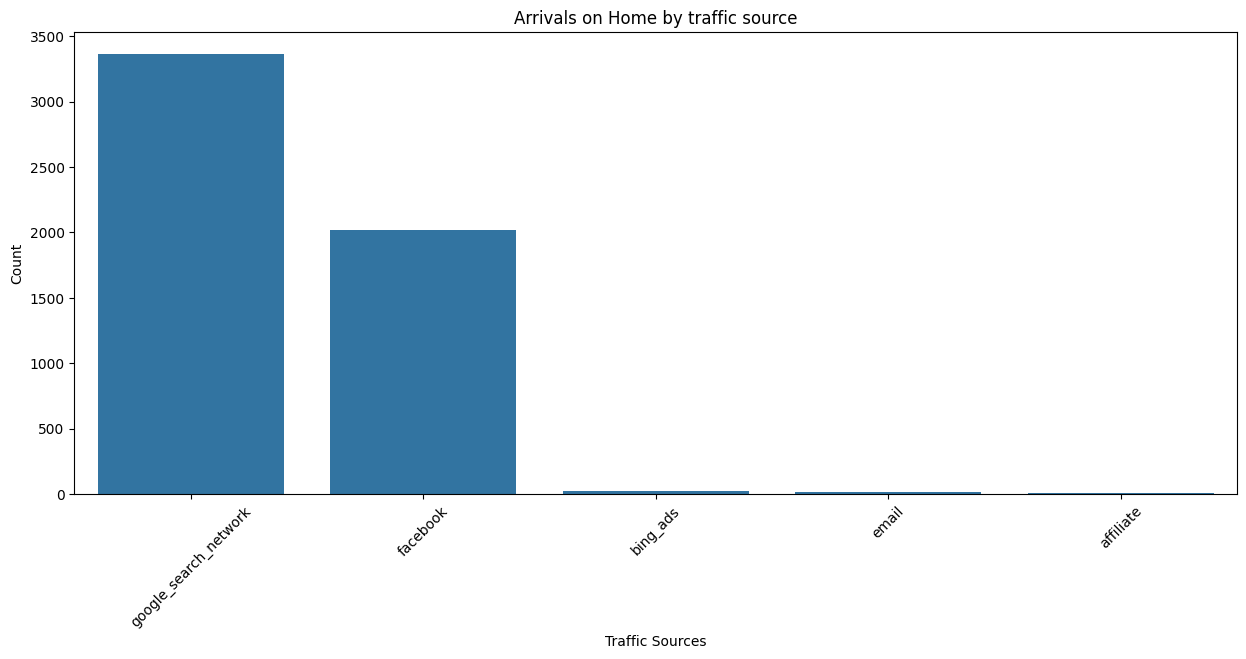

In [150]:
# Traffic sources to Home
Marketing_traffic_source_sorted = count_name_traffic_source[count_name_traffic_source['name']== 'Home'].sort_values(by='anonymous_id', ascending=False)

fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(x='traffic_source', y='anonymous_id', data=Marketing_traffic_source_sorted)

# Show the plot
plt.xlabel('Traffic Sources')
plt.ylabel('Count')
plt.title('Arrivals on Home by traffic source')


# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()

#### Group by ad_type

In [159]:
count_name_ad_type = count_name_traffic_source_ad_type.groupby(by = ['name','ad_type'])
count_name_ad_type = count_name_ad_type['anonymous_id'].sum()
count_name_ad_type = count_name_ad_type.to_frame('anonymous_id')
count_name_ad_type.reset_index(inplace=True)
count_name_ad_type

,name,ad_type,anonymous_id
0,Course Marketing,1006113,1
1,Course Marketing,1062381,6
2,Course Marketing,1188178,1
3,Course Marketing,1305684,32
4,Course Marketing,1365998,6
...,...,...,...
67,Home,1356000,4
68,Home,cart-abandon-1,7
69,Home,collection,2015
70,Home,search,3386


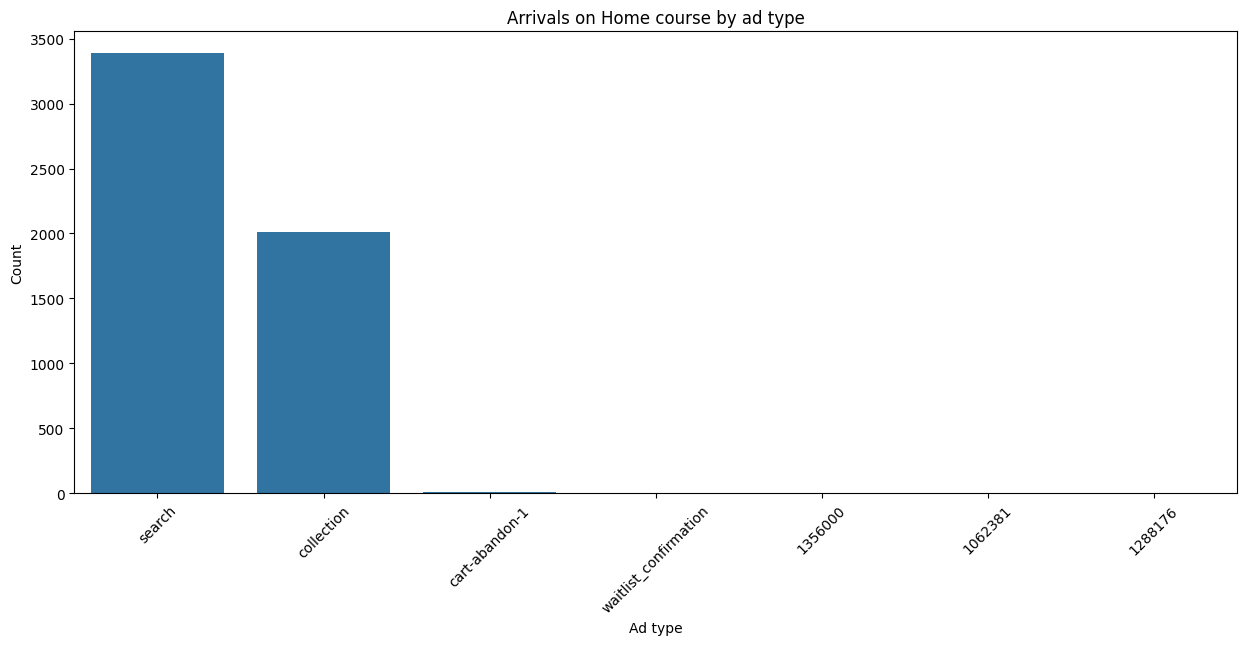

In [163]:
# Ad Type to Home page

Home_ad_type_sorted = count_name_ad_type[count_name_ad_type['name']== 'Home'].sort_values(by='anonymous_id', ascending=False)

fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(x='ad_type', y = 'anonymous_id', data = Home_ad_type_sorted)

# Show the plot
plt.xlabel('Ad type')
plt.ylabel('Count')
plt.title('Arrivals on Home course by ad type')


# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()

### Profit purchased_class

In [7]:
#when a user purchases a class or an annual-pass. When a user purchases multiple items, there will be one row per item purchase.
purchased_class.head()
    #Les cours les + achetés
    #Les cours qui ramènent le + de revenus

,anonymous_id,received_at,product_id,total,revenue,discount,is_gift
0,13d9d32f-a11b-489e-9dda-740442d60961,11/1/2017 0:39,gordon-ramsay-teaches-cooking,90,90,0,f
1,47c79436-b6e8-4009-a5e4-b82a0a32e93b,11/1/2017 1:07,gordon-ramsay-teaches-cooking,90,90,0,f
2,83259ee8-4de6-4748-94a3-1f6646c9fd69,11/1/2017 1:45,shonda-rhimes-teaches-writing-for-television,90,90,0,f
3,c44ec613-e294-42c7-b1cf-26418190fd98,11/1/2017 2:43,gordon-ramsay-teaches-cooking,90,90,0,f
4,5016b713-1269-45bf-b868-e35db22c458a,11/1/2017 3:47,werner-herzog-teaches-filmmaking,90,90,0,f


In [31]:
purchased_class[['product_id', 'revenue']].groupby(by='product_id', dropna=True, sort=True).count().sort_values(by='revenue', ascending=False)

,revenue
product_id,
gordon-ramsay-teaches-cooking,325
annual-pass,69
aaron-sorkin-teaches-screenwriting,11
dustin-hoffman-teaches-acting,11
martin-scorsese-teaches-filmmaking,9
deadmau5-teaches-electronic-music-production,9
garry-kasparov-teaches-chess,8
steve-martin-teaches-comedy,7
jane-goodall-teaches-conservation,7


In [29]:
purchased_class[['product_id', 'revenue']].groupby(by='product_id', dropna=True, sort=True).sum().sort_values(by='revenue', ascending=False)

,revenue
product_id,
gordon-ramsay-teaches-cooking,28365
annual-pass,9270
aaron-sorkin-teaches-screenwriting,900
dustin-hoffman-teaches-acting,900
martin-scorsese-teaches-filmmaking,720
deadmau5-teaches-electronic-music-production,717
garry-kasparov-teaches-chess,717
jane-goodall-teaches-conservation,630
steve-martin-teaches-comedy,540


In [8]:
#any "take the class/give as a gift" purchase on the course marketing page 
purchased_click.head()

,anonymous_id,received_at,class,location,action
0,9be8d642-3000-45db-970f-aedbc9d9ee3c,11/1/2017 0:24:58,gordon-ramsay-teaches-cooking,hero,primary
1,21862340-a8fb-4e6f-bca7-85f5cf1d2f68,11/1/2017 0:36:47,gordon-ramsay-teaches-cooking,video-carousel,primary
2,13d9d32f-a11b-489e-9dda-740442d60961,11/1/2017 0:37:53,gordon-ramsay-teaches-cooking,hero,primary
3,13d9d32f-a11b-489e-9dda-740442d60961,11/1/2017 0:37:19,gordon-ramsay-teaches-cooking,hero,primary
4,abe3e8aa-b323-47d8-b7e0-2507ee081646,11/4/2017 21:53:28,gordon-ramsay-teaches-cooking,hero,primary
